Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "agentWSS"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$. \\
$f'(x)=\frac{-3f(x)+4f(x+h)-f(x+2h)}{2h}$

In [5]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [6]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


YOUR ANSWER HERE

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [7]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

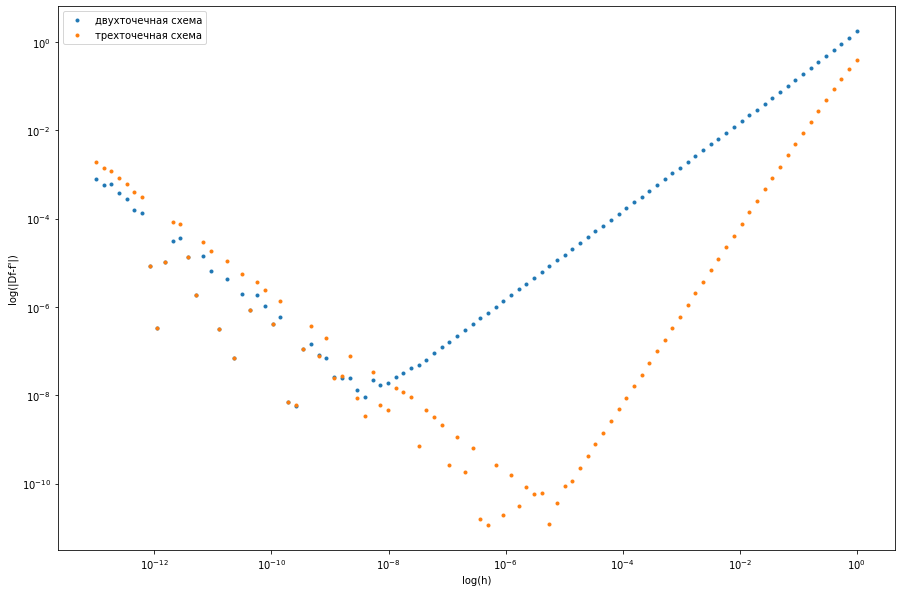

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = 1
h_list = np.logspace(-13, 0, num=100)

def deriv2(f, x, h):
  return (f(x + h) - f(x)) / h

plt.figure(figsize=(15, 10))
plt.xlabel('log(h)')
plt.ylabel('log(|Df-f\'|)')
plt.loglog(h_list, np.abs([fder(x) - deriv2(f, x, h) for h in h_list]), '.', label='двухточечная схема')
plt.loglog(h_list, np.abs([fder(x) - deriv(f, x, h) for h in h_list]), '.', label='трехточечная схема')
plt.legend()
plt.show()


### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [21]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


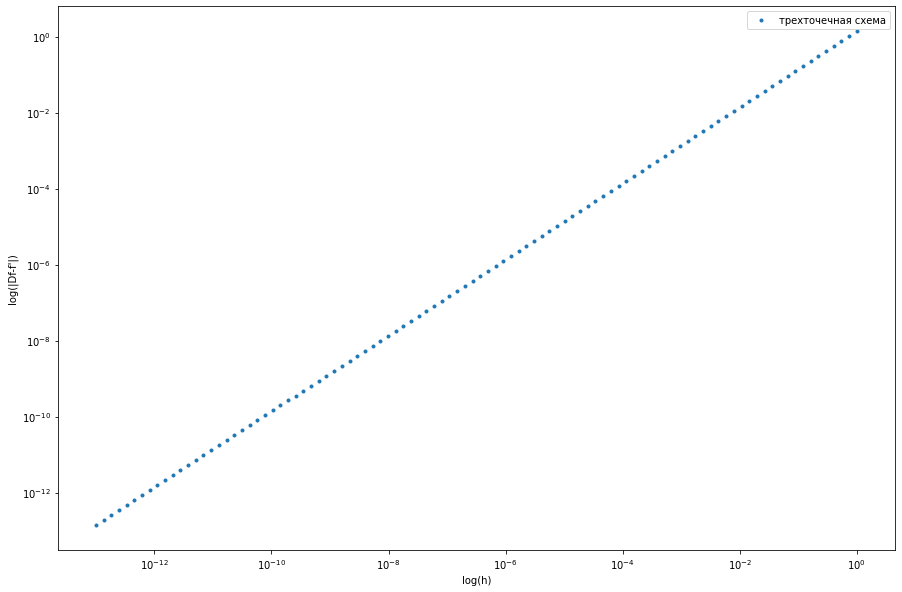

In [27]:
x=0

plt.figure(figsize=(15, 10))

plt.loglog(h_list, np.abs([fder(x) - deriv(f, x, h) for h in h_list]), '.', label='трехточечная схема')
plt.xlabel('log(h)')
plt.ylabel("log(|Df-f'|)")
plt.legend()
plt.show()


Мы наблюдаем прямую зависимость: 
$ɛ = \frac{4h^2\log(h)-4h^2\log(2h)}{2h} = 2\log(2)h$ 


# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [69]:
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    
    n=1 
    integral = func((a + b) / 2) * (b - a)
    integral_2 = func((3 * a + b) / 4) * (b - a) / 2 + func((a + 3 * b) / 4) * (b - a) / 2

    while abs(integral - integral_2) >= eps:
        integral = 0
        integral_2 = 0
        n += 1
        h=(b-a)/n
        for i in range(1, n + 1):
            integral += func((i - 0.5) * h) * h
        h = (b - a) / (2 * n) 
        for i in range(1, 2 * n + 1):
            integral_2 += func((i - 0.5) * h) * h

    return integral_2, n


### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


(8.999681122448976, 42)

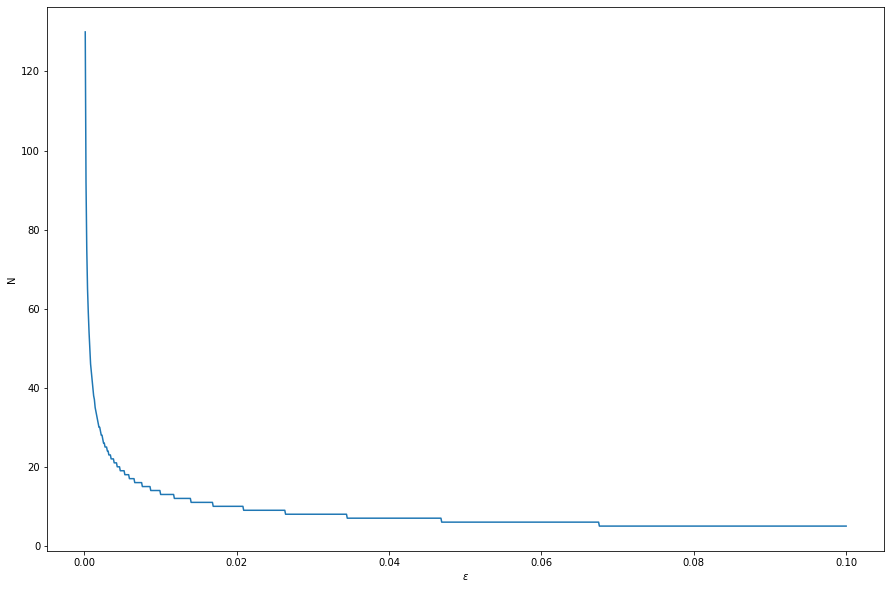

In [70]:
f = lambda x : x**2

a = 0
b = 3

n = [midpoint_rule(f, a, b, eps)[1] for eps in np.linspace(0.0001, 0.1, 1000)]

plt.figure(figsize=(15, 10))
plt.plot(np.linspace(0.0001, 0.1, 1000), n)
plt.xlabel(r'$\varepsilon$')
plt.ylabel('N')

midpoint_rule(f, a, b, 0.001)

Разница с вычислением "руками" составила менее 0.001 (ɛ =0,00031887756), значит результат попадает в интервал заданной ошибки.

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

$y=\sqrt x$

$dx=2ydy$

для второго случая: 

$\frac{\sin(\sqrt x)}{x}=\frac{\sin(\sqrt x)}{x}-\frac{1}{\sqrt x}+\frac{1}{\sqrt x}$

Далее при замене $y=\sqrt x$ последнеее подинтегральное слагаемое будет $2dy$

In [68]:
import numpy as np

a = 0
b = 1
eps = 1e-4

f_1 = lambda t: 2 * np.sin(t) / t
result, n = midpoint_rule(f_1, a, b, eps)
print(result, n)

f_2 = lambda x: 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)
result, n = midpoint_rule(f_2, a, b, eps)
print(result, n)

1.8922941998480554 14
1.8920193180026728 16


Во втором случае потребовалось на 2 шага больше.

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [ ]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
